PEOPLE:

RAYAAN IRANI

SAAKEH KOKA

VEDANT NILABH

ELIAS MANN

In [64]:
import keras.metrics
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation

# Importing the data

In [65]:
data = pd.read_csv('data.csv')

/Users/saakethkoka/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Deciding whether to keep or drop data
ID -> Drop
Client_Income -> Keep
Car_Owned -> Keep
Bike_Owned -> Keep
Active_Loan -> Keep
House_Own -> Keep
Child_Count -> Keep
Credit_Amount-> Keep
Loan_Annuity-> Keep
Accompany_Client-> Drop
Client_Income_Type-> Keep
Client_Education-> Keep
Client_Marital_Status-> Keep
Client_Gender-> Drop
Loan_Contract_Type-> Keep 
Client_Housing_Type -> Drop
Population_Region_Relative-> Keep
Age_Days-> Keep
Employed_Days -> Keep
Registration_Days -> Drop
ID_Days -> Drop
Own_House_Age -> Keep
Mobile_Tag -> Drop
Homephone_Tag -> Drop
Workphone_Working -> Drop
Client_Occupation -> Keep
Client_Family_Members -> Keep
Cleint_City_Rating -> Drop
Application_Process_Day -> Drop
Application_Process_Hour -> Drop
Client_Permanent_Match_Tag -> Drop
Client_Contact_Work_Tag -> Drop
Type_Organization -> Drop
Score_Source_1 -> Keep
Score_Source_2 -> Keep
Score_Source_3 -> Keep
Social_Circle_Default -> Drop
Phone_Change -> Drop
Credit_Bureau -> Drop
Default -> Target Class

In [66]:
drop_cols = ["ID", "Accompany_Client", "Client_Gender", "Client_Housing_Type", "Registration_Days", "ID_Days",
 "Mobile_Tag", "Homephone_Tag", "Workphone_Working", "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour",
 "Client_Permanent_Match_Tag", "Client_Contact_Work_Tag", "Type_Organization", "Social_Circle_Default", "Phone_Change","Credit_Bureau"]

data.drop(drop_cols, axis=1, inplace=True)

In [67]:
data

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,Population_Region_Relative,Age_Days,Employed_Days,Own_House_Age,Client_Occupation,Client_Family_Members,Score_Source_1,Score_Source_2,Score_Source_3,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,...,0.028663,13957,1062,NaN,Sales,2.0,0.568066,0.478787,NaN,0
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,Graduation,...,0.008575,14162,4129,0.0,NaN,2.0,0.563360,0.215068,NaN,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,Graduation dropout,...,0.0228,16790,5102,NaN,Realty agents,2.0,NaN,0.552795,0.329655,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,Secondary,...,0.010556,23195,365243,NaN,NaN,2.0,NaN,0.135182,0.631355,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,Secondary,...,0.020713,11366,2977,6.0,Laborers,4.0,0.508199,0.301182,0.355639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,Secondary,...,0.031329,12889,2863,NaN,Laborers,2.0,NaN,0.173527,0.184116,1
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,Graduation,...,0.018209,8648,636,NaN,Sales,2.0,NaN,0.371559,0.406617,0
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,Secondary,...,0.008068,9152,1623,NaN,High skill tech,3.0,0.169049,0.048079,NaN,0
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,Graduation,...,0.028663,10290,847,4.0,Sales,2.0,0.182737,0.103538,0.0774985,0


### How much of each of the remaining columns is missing?

In [68]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{}: {}%'.format(col, round(pct_missing*100)))

Client_Income: 3%
Car_Owned: 3%
Bike_Owned: 3%
Active_Loan: 3%
House_Own: 3%
Child_Count: 3%
Credit_Amount: 3%
Loan_Annuity: 4%
Client_Income_Type: 3%
Client_Education: 3%
Client_Marital_Status: 3%
Loan_Contract_Type: 3%
Population_Region_Relative: 4%
Age_Days: 3%
Employed_Days: 3%
Own_House_Age: 66%
Client_Occupation: 34%
Client_Family_Members: 2%
Score_Source_1: 56%
Score_Source_2: 5%
Score_Source_3: 22%
Default: 0%


Some of these columns have a lot of data missing. And simply taking out the missing rows from these columns will drastically reduce the size of our dataset. For this reason we are choosing to remove the features with more than 10% missing data.

In [69]:
drop_cols = ["Own_House_Age", "Client_Occupation", "Score_Source_1", "Score_Source_3"]
data.drop(drop_cols, axis=1, inplace=True)
data.dropna(inplace=True)
data

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Loan_Contract_Type,Population_Region_Relative,Age_Days,Employed_Days,Client_Family_Members,Score_Source_2,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,M,CL,0.028663,13957,1062,2.0,0.478787,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,Graduation dropout,W,CL,0.0228,16790,5102,2.0,0.552795,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,Secondary,M,CL,0.010556,23195,365243,2.0,0.135182,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,Secondary,M,CL,0.020713,11366,2977,4.0,0.301182,0
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Service,Secondary,W,CL,0.019101,13881,1184,2.0,0.697928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121850,12150,0.0,0.0,1.0,0.0,0.0,78192,2383.65,Retired,Secondary,S,CL,0.01885,23943,365243,1.0,0.678249,0
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,Graduation,M,CL,0.018209,8648,636,2.0,0.371559,0
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,Secondary,M,CL,0.008068,9152,1623,3.0,0.048079,0
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,Graduation,M,CL,0.028663,10290,847,2.0,0.103538,0


## Describing the Dataset:

Clinet_Income: Client Income in $, Integer

Car_Owned: Does client own another car?, Categorical 1 for Yes 0 for No

Bike_Owned: Does client own a Bike?, Categorical 1 for Yes 0 for No

Active_Loan: Does client have another active loan?, Categorical 1 for Yes 0 for No

House_Own: Does client own a house?, Categorical 1 for Yes 0 for No

Child_Count: How many children does the client own?, Integer

Credit_Amount: Credit amount of the loan in $, Integer

Loan_Annuity: Loan annuity in $, Integer

Client_Income_Type: Type of income of the client, Categorical

Client_Education: Education level of the client, Categorical

Client_Marital_Status: Marital status of the client, Categorical

Loan_Contract_Type: Type of loan contract, Categorical

Population_Region_Relative: Normalized population of region where client lives (higher number means the client lives in more populated region), Float

Age_Days: Age of the client in days, Integer

Employed_Days: How many days has the client been employed? Integer

Clinet_Family_Members: How many family members does the client have? Integer

Score_Source_2: Normalized score from external data source, Float

Default: Did the client default on the loan?, Categorical 1 for Yes 0 for No

In [70]:
columns = ["Employed_Days", "Age_Days", "Client_Income", "Credit_Amount", "Loan_Annuity", "Population_Region_Relative"]

# Drop all rows where the column has non-numeric values:
print(len(data))
for col in columns:
    data = data[data[col] != 'x']
    data = data[data[col] != '$']
    data = data[data[col] != '@']
    data = data[data[col] != '#']
    data = data[data[col] != '#VALUE!']
print(len(data))

# Setting datatype of these columns to float64:
for col in columns:
    data[col] = data[col].astype('float64')

70918
70882


In [71]:
data.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Loan_Contract_Type             object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Client_Family_Members         float64
Score_Source_2                float64
Default                         int64
dtype: object

In [72]:
categorical_headers = ["Client_Income_Type", "Client_Education", "Client_Marital_Status", "Loan_Contract_Type", "Car_Owned", "Bike_Owned", "Active_Loan", "House_Own"]
numerical_headers = ["Client_Income","Child_Count", "Credit_Amount","Loan_Annuity","Population_Region_Relative","Age_Days","Employed_Days","Client_Family_Members", "Score_Source_2"]

In [73]:
# Convert all categorical headers to strings:
for col in categorical_headers:
    data[col] = data[col].astype('str')

In [74]:
data.dtypes

Client_Income                 float64
Car_Owned                      object
Bike_Owned                     object
Active_Loan                    object
House_Own                      object
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Loan_Contract_Type             object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Client_Family_Members         float64
Score_Source_2                float64
Default                         int64
dtype: object

## Model Performance Algorithm:

To quantify model performance, we will be using the false omission rate, which is defined as the false negatives divided by the sum of the true and false negatives, or the total negative class predictions of our model. In our case, the negative class represents approved loans by our model, and the false omission rate is essentially the percentage of the loans that our model would hypothetically approve that results in a default. Assuming the worst case, this would mean that all the money we gave to that percetnage of people is gone, and we need to make up the rest through the interest earned on the "good" loans (not accounting for loan size). Thus, if we take the total amount of loan that we give and the false omission rate and assume equal size of the loans in question, we need to charge approximately the False Omission Rate as our intereest rate in order to break even. The average interest rate on Car loans is 5.3%, according to bank of America, but we want to make money, so we need to get the rate to at least below 5%, and even lower, if possible, for our model to be viable in a practical setting.
source: https://www.bankofamerica.com/auto-loans/auto-loan-rates/

## Splitting the data:

We have a very imbalanced dataset with respect to the target class, with 8% of the final preprocessed data being loans that resulted in default and 92% not resulting in default. However, we do have a lot of data (>70k observations), so we can use a train_test split, but in order to accurately get a good indication of performance on hte test set, we will use a 50-50 stratified split between the train and test data to ensure that we are getting an accurate indication of out-of-sample performance when cross-validating with the test data. This is important because we want the training and testing data to follow that same distribution with respect to the target class, and, in the real world, this is a very realistic imbalance to have because a lot more people typically will pay their loan back compared to the amount that default. Since we have a lot of datapoints, we can still use this simple train--test split to get an accurate indication of model performance, as a lot of data is being withheld still, and we will be able to tell based on test performance whether the model is properly trained or is under fitted/fitting noise.

In [75]:
target = data["Default"]
features = data.drop(columns=['Default'])

# Cross Product Features

1. Client_Income_Type, Client_Education, Client_Marital_Status, Loan_Contract_Type
We believe that these crossing these four fields will provide trainable information for our model to memorize. For example, our model may memorize that an Unemployed client with no secondary education, who is single and applying for a commercial loan is at high risk of defaulting. Or on the other hand, a Client with a commercial income, graduate education and is married applying for a retail loan is not a significant credit risk.
2. Car_Owned, Client_Education, Client_Marital_Status
With these three the model may be able to memorize certain household data such as an Graduate level educated client who is married and owns a car vs a Secondary Dropout who is Single and own Car_Owned.
3. House_Own, Car_Owned, Bike_Owned, Active_Loan
Our model may be able to memorize certain situations such as when a Client has a House, Car and a Bike but no active loan which may suggest that a client is not a credit risk.

In [76]:
# Columns to be crossed
cross_columns = [
                 ['Client_Income_Type','Client_Education','Client_Marital_Status','Loan_Contract_Type'],
                 ['Car_Owned', 'Client_Education', "Client_Marital_Status"],
                 ['House_Own','Car_Owned', 'Bike_Owned', "Active_Loan"]
]

encoders = {

}

cross_col_df_names = []
for cols_list in cross_columns:

    enc = LabelEncoder()

    # 1. create crossed labels by join operation
    features_crossed = features[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((features_crossed.to_numpy())))
    
    # 3. Save into dataframe with new name
    features[cross_col_name] = enc.transform(features_crossed)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 

# Label encode all of the categrorical headers:
for col in categorical_headers:
    encoders[col] = LabelEncoder()
    features[col] = encoders[col].fit_transform(features[col])

In [77]:
# stratified split 80-20:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=89, stratify=target)

# Modeling

In [78]:
# split the feature dataframe into categorical_features and numerical_features:
categorical_features_train = X_train[categorical_headers]
crossed_features_train = X_train[cross_col_df_names]
numerical_features_train = X_train[numerical_headers]

categorical_features_test = X_test[categorical_headers]
crossed_features_test = X_test[cross_col_df_names]
numerical_features_test = X_test[numerical_headers]

X_crossed = crossed_features_train.to_numpy()
X_cat = categorical_features_train.to_numpy()
X_num = numerical_features_train.to_numpy()

In [79]:
%%time
# Keras input:
from tensorflow.keras.layers import Input, Dense, concatenate, Embedding
from tensorflow.keras.models import Model
input_crossed = Input(shape=(crossed_features_train.shape[1],), 
                     dtype='int64', 
                     name='wide_inputs')

crossed_outputs = []
for idx,col in enumerate(cross_col_df_names):

    N = len(encoders[col].classes_)

    N_reduced = int(np.sqrt(N))

    x = tf.gather(input_crossed, idx, axis=1)

    x = Embedding(input_dim=N, output_dim=N_reduced,
     input_length=1, name=col+"_embed")(x)

    crossed_outputs.append(x)
wide_branch = concatenate(crossed_outputs, name='wide_concat')
all_deep_branch_outputs = []
# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers):

    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = features[col].max()+1
    N_reduced = int(np.sqrt(N))

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=N_reduced,
                  input_length=1, name=col+'_embed')(x)

    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)

# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)

all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=20,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model1 = Model(inputs=[input_crossed,input_cat,input_num],outputs=final_branch)

class_weight = {0: 1,
                1: 30}

model1.compile(optimizer='adam',
              loss='binary_crossentropy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history1 = model1.fit([X_crossed,X_cat,X_num],
                    y_train,
                    class_weight=class_weight,
                    validation_data=([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()], y_test),
                    epochs=25,
                    batch_size=512,
                    verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 8ms/step - loss: 1459.7911 - val_loss: 129.4501
Epoch 2/25
70/70 [==============================] - 0s 5ms/step - loss: 119.5900 - val_loss: 92.0361
Epoch 3/25
70/70 [==============================] - 0s 5ms/step - loss: 80.3786 - val_loss: 22.6404
Epoch 4/25
70/70 [==============================] - 0s 4ms/step - loss: 63.7770 - val_loss: 33.1966
Epoch 5/25
70/70 [==============================] - 0s 5ms/step - loss: 56.3261 - val_loss: 63.8510
Epoch 6/25
70/70 [==============================] - 1s 8ms/step - loss: 85.1845 - val_loss: 19.3989
Epoch 7/25
70/70 [==============================] - 0s 5ms/step - loss: 54.4803 - val_loss: 47.8542
Epoch 8/25
70/70 [==============================] - 0s 6ms/step - loss: 51.8176 - val_loss: 70.9338
Epoch 9/25
70/70 [==============================] - 0s 6ms/step - loss: 55.5536 - val_loss: 10.4502
Epoch 10/25
70/70 [==============================] - 0s 6ms/step - loss: 58.1331 - val_loss: 114

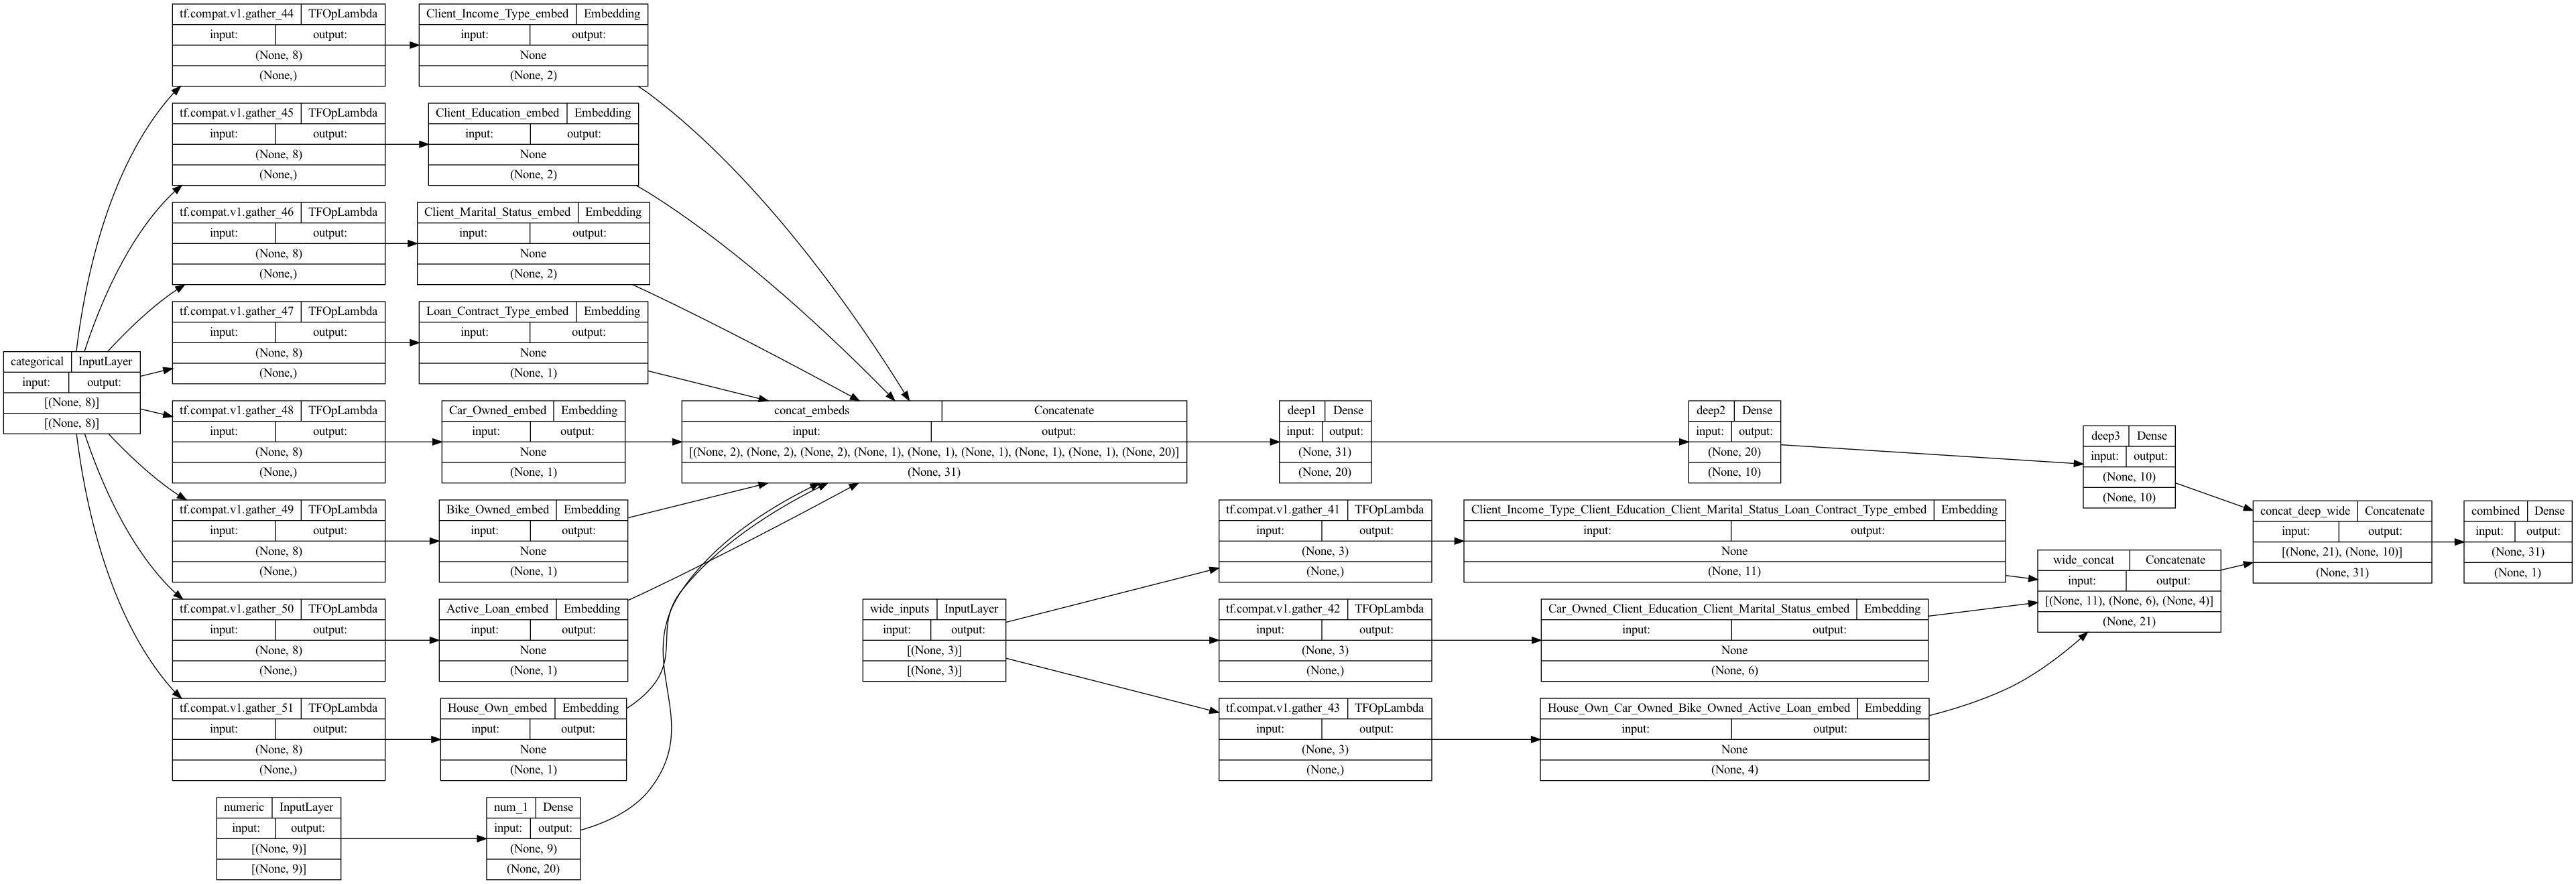

In [80]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model1, show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [81]:
# Calculate the false omission rate:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
print('False omission rate: ', fn/(tn+fn))

False omission rate:  0.06858528192695706


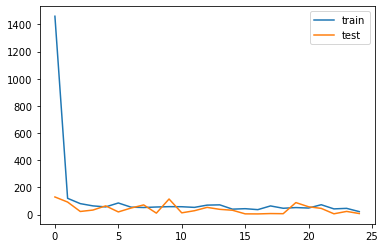

In [82]:
# plot history:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()

This graph shows the train / test loss of the network (y-axis) as the number of epochs increase (x-axis). As this graph indicates, the network loss was initially high and had high variance but, as the number of epochs increased, the loss converged at 2 epochs.


### Model 2

For this model we added 2 more layer and more neurons to the initial layers in the deep network to see if we could achieve better generalization using a deeper model.

In [83]:
%%time
# Keras input:
from tensorflow.keras.layers import Input, Dense, concatenate, Embedding
from tensorflow.keras.models import Model
input_crossed = Input(shape=(crossed_features_train.shape[1],), 
                     dtype='int64', 
                     name='wide_inputs')

crossed_outputs = []
for idx,col in enumerate(cross_col_df_names):

    N = len(encoders[col].classes_)

    N_reduced = int(np.sqrt(N))

    x = tf.gather(input_crossed, idx, axis=1)

    x = Embedding(input_dim=N, output_dim=N_reduced,
     input_length=1, name=col+"_embed")(x)

    crossed_outputs.append(x)
wide_branch = concatenate(crossed_outputs, name='wide_concat')
all_deep_branch_outputs = []
# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers):

    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = features[col].max()+1
    N_reduced = int(np.sqrt(N))

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=N_reduced,
                  input_length=1, name=col+'_embed')(x)

    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)

# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)

all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=256,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=128,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=64,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=32,activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)

# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model2 = Model(inputs=[input_crossed,input_cat,input_num],outputs=final_branch)

class_weight = {0: 1,
                1: 25}

model2.compile(optimizer='adam', loss='binary_crossentropy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history2 = model2.fit([X_crossed,X_cat,X_num],
                    y_train,
                    class_weight=class_weight,
                    validation_data=([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()], y_test),
                    epochs=5,
                    batch_size=32,
                    verbose=1)

Epoch 1/5
1108/1108 [==============================] - 8s 5ms/step - loss: 4.1581 - val_loss: 1.0583
Epoch 2/5
1108/1108 [==============================] - 5s 4ms/step - loss: 1.7720 - val_loss: 1.0700
Epoch 3/5
1108/1108 [==============================] - 6s 5ms/step - loss: 1.7660 - val_loss: 1.0887
Epoch 4/5
1108/1108 [==============================] - 6s 6ms/step - loss: 1.7636 - val_loss: 1.1068
Epoch 5/5
1108/1108 [==============================] - 4s 4ms/step - loss: 1.7619 - val_loss: 1.0285
CPU times: user 50.9 s, sys: 16.3 s, total: 1min 7s
Wall time: 29.2 s


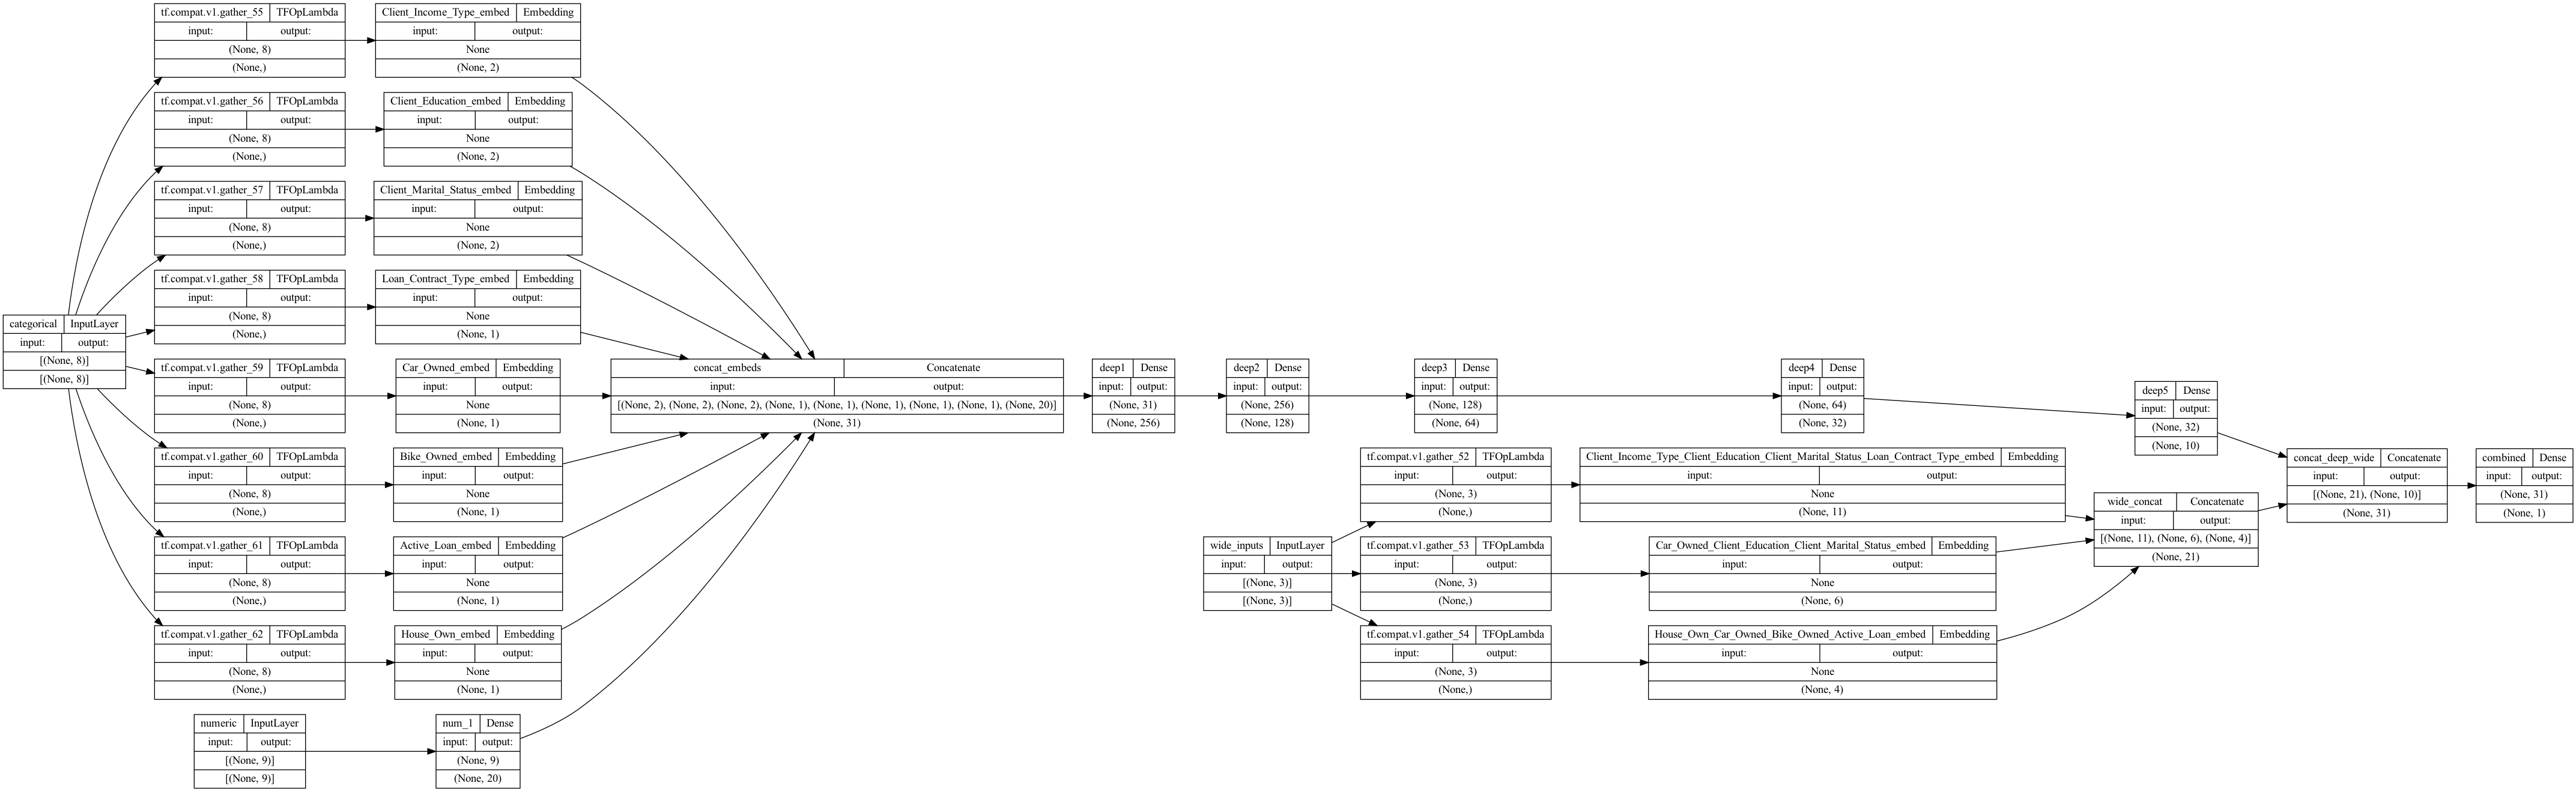

In [84]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model2, show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [85]:
# Calculate the false omission rate:
from sklearn.metrics import confusion_matrix
y_pred = model2.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
print('False omission rate: ', fn/(tn+fn))

False omission rate:  0.04304220643543669


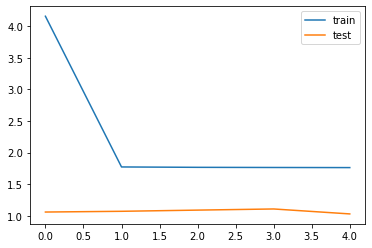

In [86]:
# plot history:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()

This graph shows the loss for the second model. As is seen, this model converges very quickly. The false emission rate of the model is 4.3% which is lower than the 6% of the earlier model. This value meets our set goal of a false omission rate of less than 5%.

### Model 3

For the 3rd Model, we used the same wide and deep network structure as model 2 in terms of the fully connected layers but added a Dropout Layer followed by a Batch normalization layer after each Dense Layer so as to prevent overfitting in our deep network and batch norm theoretically makes the contribution from each layer, and thus the network more stable and helps with convergence.

In [87]:
%%time
# Keras input:
from tensorflow.keras.layers import Input, Dense, concatenate, Embedding, Dropout, BatchNormalization
from tensorflow.keras.models import Model
input_crossed = Input(shape=(crossed_features_train.shape[1],), 
                     dtype='int64', 
                     name='wide_inputs')

crossed_outputs = []
for idx,col in enumerate(cross_col_df_names):

    N = len(encoders[col].classes_)

    N_reduced = int(np.sqrt(N))

    x = tf.gather(input_crossed, idx, axis=1)

    x = Embedding(input_dim=N, output_dim=N_reduced,
     input_length=1, name=col+"_embed")(x)

    crossed_outputs.append(x)
wide_branch = concatenate(crossed_outputs, name='wide_concat')
all_deep_branch_outputs = []
# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers):

    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = features[col].max()+1
    N_reduced = int(np.sqrt(N))

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=N_reduced,
                  input_length=1, name=col+'_embed')(x)

    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)

# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)

all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=256,activation='relu', name='deep1')(deep_branch)
deep_branch = Dropout(0.2)(deep_branch)
deep_branch = BatchNormalization()(deep_branch)
deep_branch = Dense(units=128,activation='relu', name='deep2')(deep_branch)
deep_branch = Dropout(0.2)(deep_branch)
deep_branch = BatchNormalization()(deep_branch)
deep_branch = Dense(units=64,activation='relu', name='deep3')(deep_branch)
deep_branch = Dropout(0.2)(deep_branch)
deep_branch = BatchNormalization()(deep_branch)
deep_branch = Dense(units=32,activation='relu', name='deep4')(deep_branch)
deep_branch = Dropout(0.2)(deep_branch)
deep_branch = BatchNormalization()(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)

# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model3 = Model(inputs=[input_crossed,input_cat,input_num],outputs=final_branch)

class_weight = {0: 1,
                1: 25}

model3.compile(optimizer='adam', loss='binary_crossentropy')


history3 = model3.fit([X_crossed,X_cat,X_num],
                    y_train,
                    class_weight=class_weight,
                    validation_data=([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()], y_test),
                    epochs=4,
                    batch_size=256,
                    verbose=1)

Epoch 1/4
139/139 [==============================] - 8s 17ms/step - loss: 1.8748 - val_loss: 0.9233
Epoch 2/4
139/139 [==============================] - 2s 13ms/step - loss: 1.7840 - val_loss: 1.0836
Epoch 3/4
139/139 [==============================] - 2s 13ms/step - loss: 1.7604 - val_loss: 1.0940
Epoch 4/4
139/139 [==============================] - 1s 11ms/step - loss: 1.7581 - val_loss: 1.1402
CPU times: user 19.6 s, sys: 6.09 s, total: 25.7 s
Wall time: 14 s


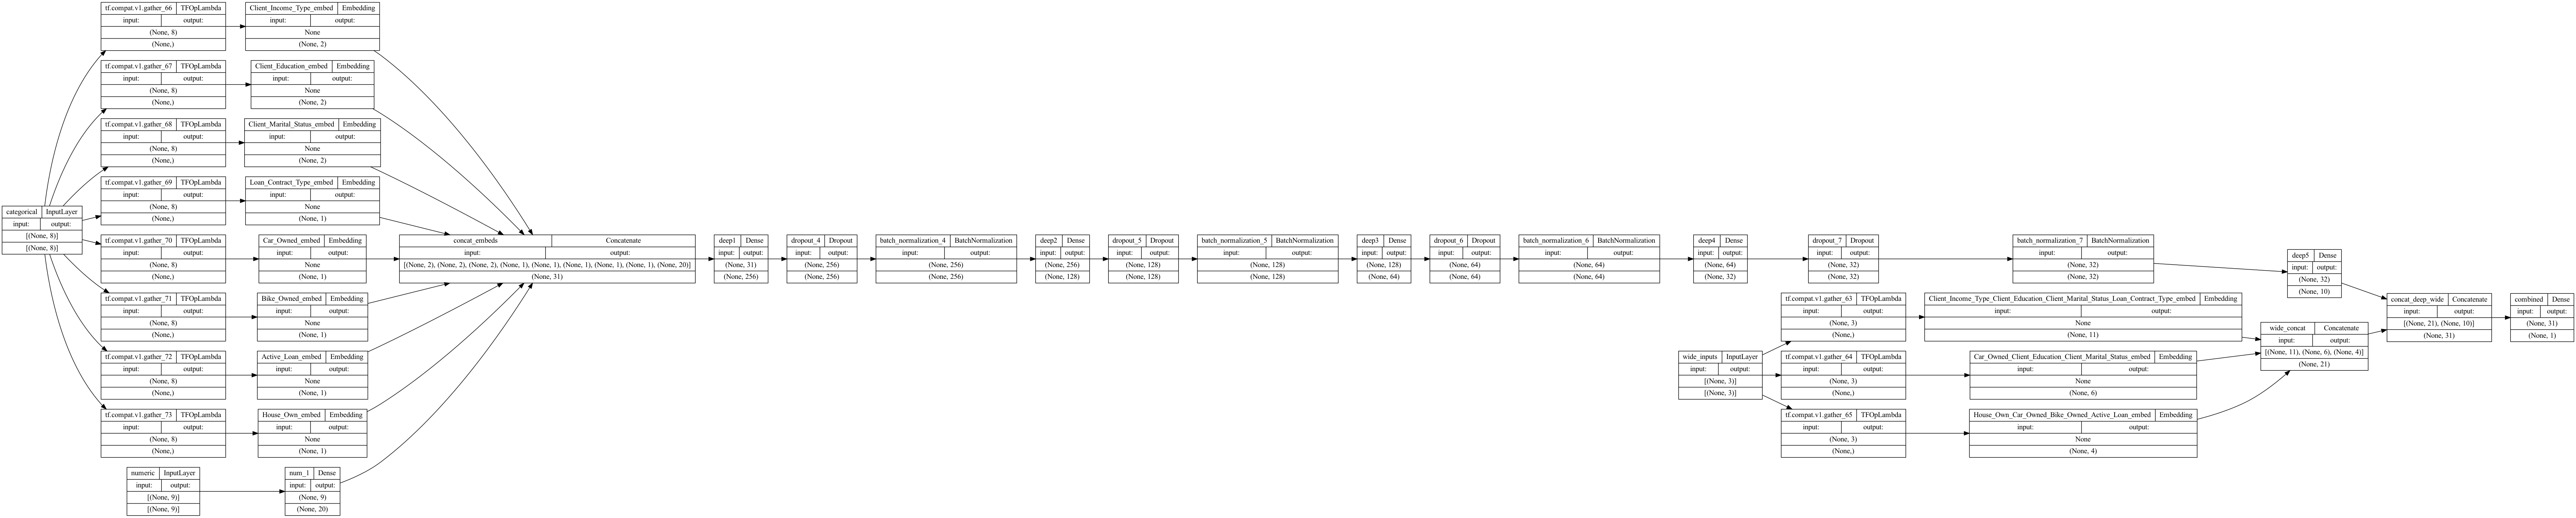

In [88]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [89]:
# Calculate the false omission rate:
from sklearn.metrics import confusion_matrix
y_pred = model3.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
print('False omission rate: ', fn/(tn+fn))

False omission rate:  0.03812636165577342


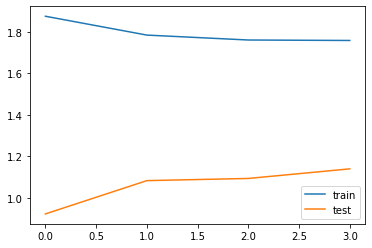

In [90]:
# plot history:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()

This convergence graph is actually noticeably different from the others. and we suspect that this is primarily due to the use of Batch normalization and/or Droput, which leads to much greater stability and faster convergence of the model. We do get a noticable improvement in the False Omission rate, as it is 3.3% for this model, meaning we will make a profit equal to 1/3 of the total value of the loans we give out (with the many assumptions we highlighted above).

### Basic MLP

In [91]:
%%time
# Keras input:
from tensorflow.keras.layers import Input, Dense, concatenate, Embedding
from tensorflow.keras.models import Model
all_deep_branch_outputs = []
# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers):

    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = features[col].max()+1
    N_reduced = int(np.sqrt(N))

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=N_reduced,
                  input_length=1, name=col+'_embed')(x)

    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)

# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)

all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=20,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

# merge the deep and wide branch
final_branch = Dense(units=1,activation='sigmoid', name='combined')(deep_branch)

model4 = Model(inputs=[input_cat,input_num],outputs=final_branch)

class_weight = {0: 1,
                1: 30}

model4.compile(optimizer='adam',
              loss='binary_crossentropy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history4 = model4.fit([X_cat,X_num],
                    y_train,
                    class_weight=class_weight,
                    validation_data=([categorical_features_test.to_numpy(), numerical_features_test.to_numpy()], y_test),
                    epochs=5,
                    batch_size=512,
                    verbose=1)

Epoch 1/5
70/70 [==============================] - 2s 7ms/step - loss: 3040.7095 - val_loss: 90.1105
Epoch 2/5
70/70 [==============================] - 0s 4ms/step - loss: 100.0837 - val_loss: 57.3872
Epoch 3/5
70/70 [==============================] - 0s 4ms/step - loss: 72.6752 - val_loss: 51.4530
Epoch 4/5
70/70 [==============================] - 0s 5ms/step - loss: 55.5236 - val_loss: 13.8771
Epoch 5/5
70/70 [==============================] - 0s 4ms/step - loss: 44.6820 - val_loss: 20.5443
CPU times: user 4.37 s, sys: 791 ms, total: 5.16 s
Wall time: 3.41 s


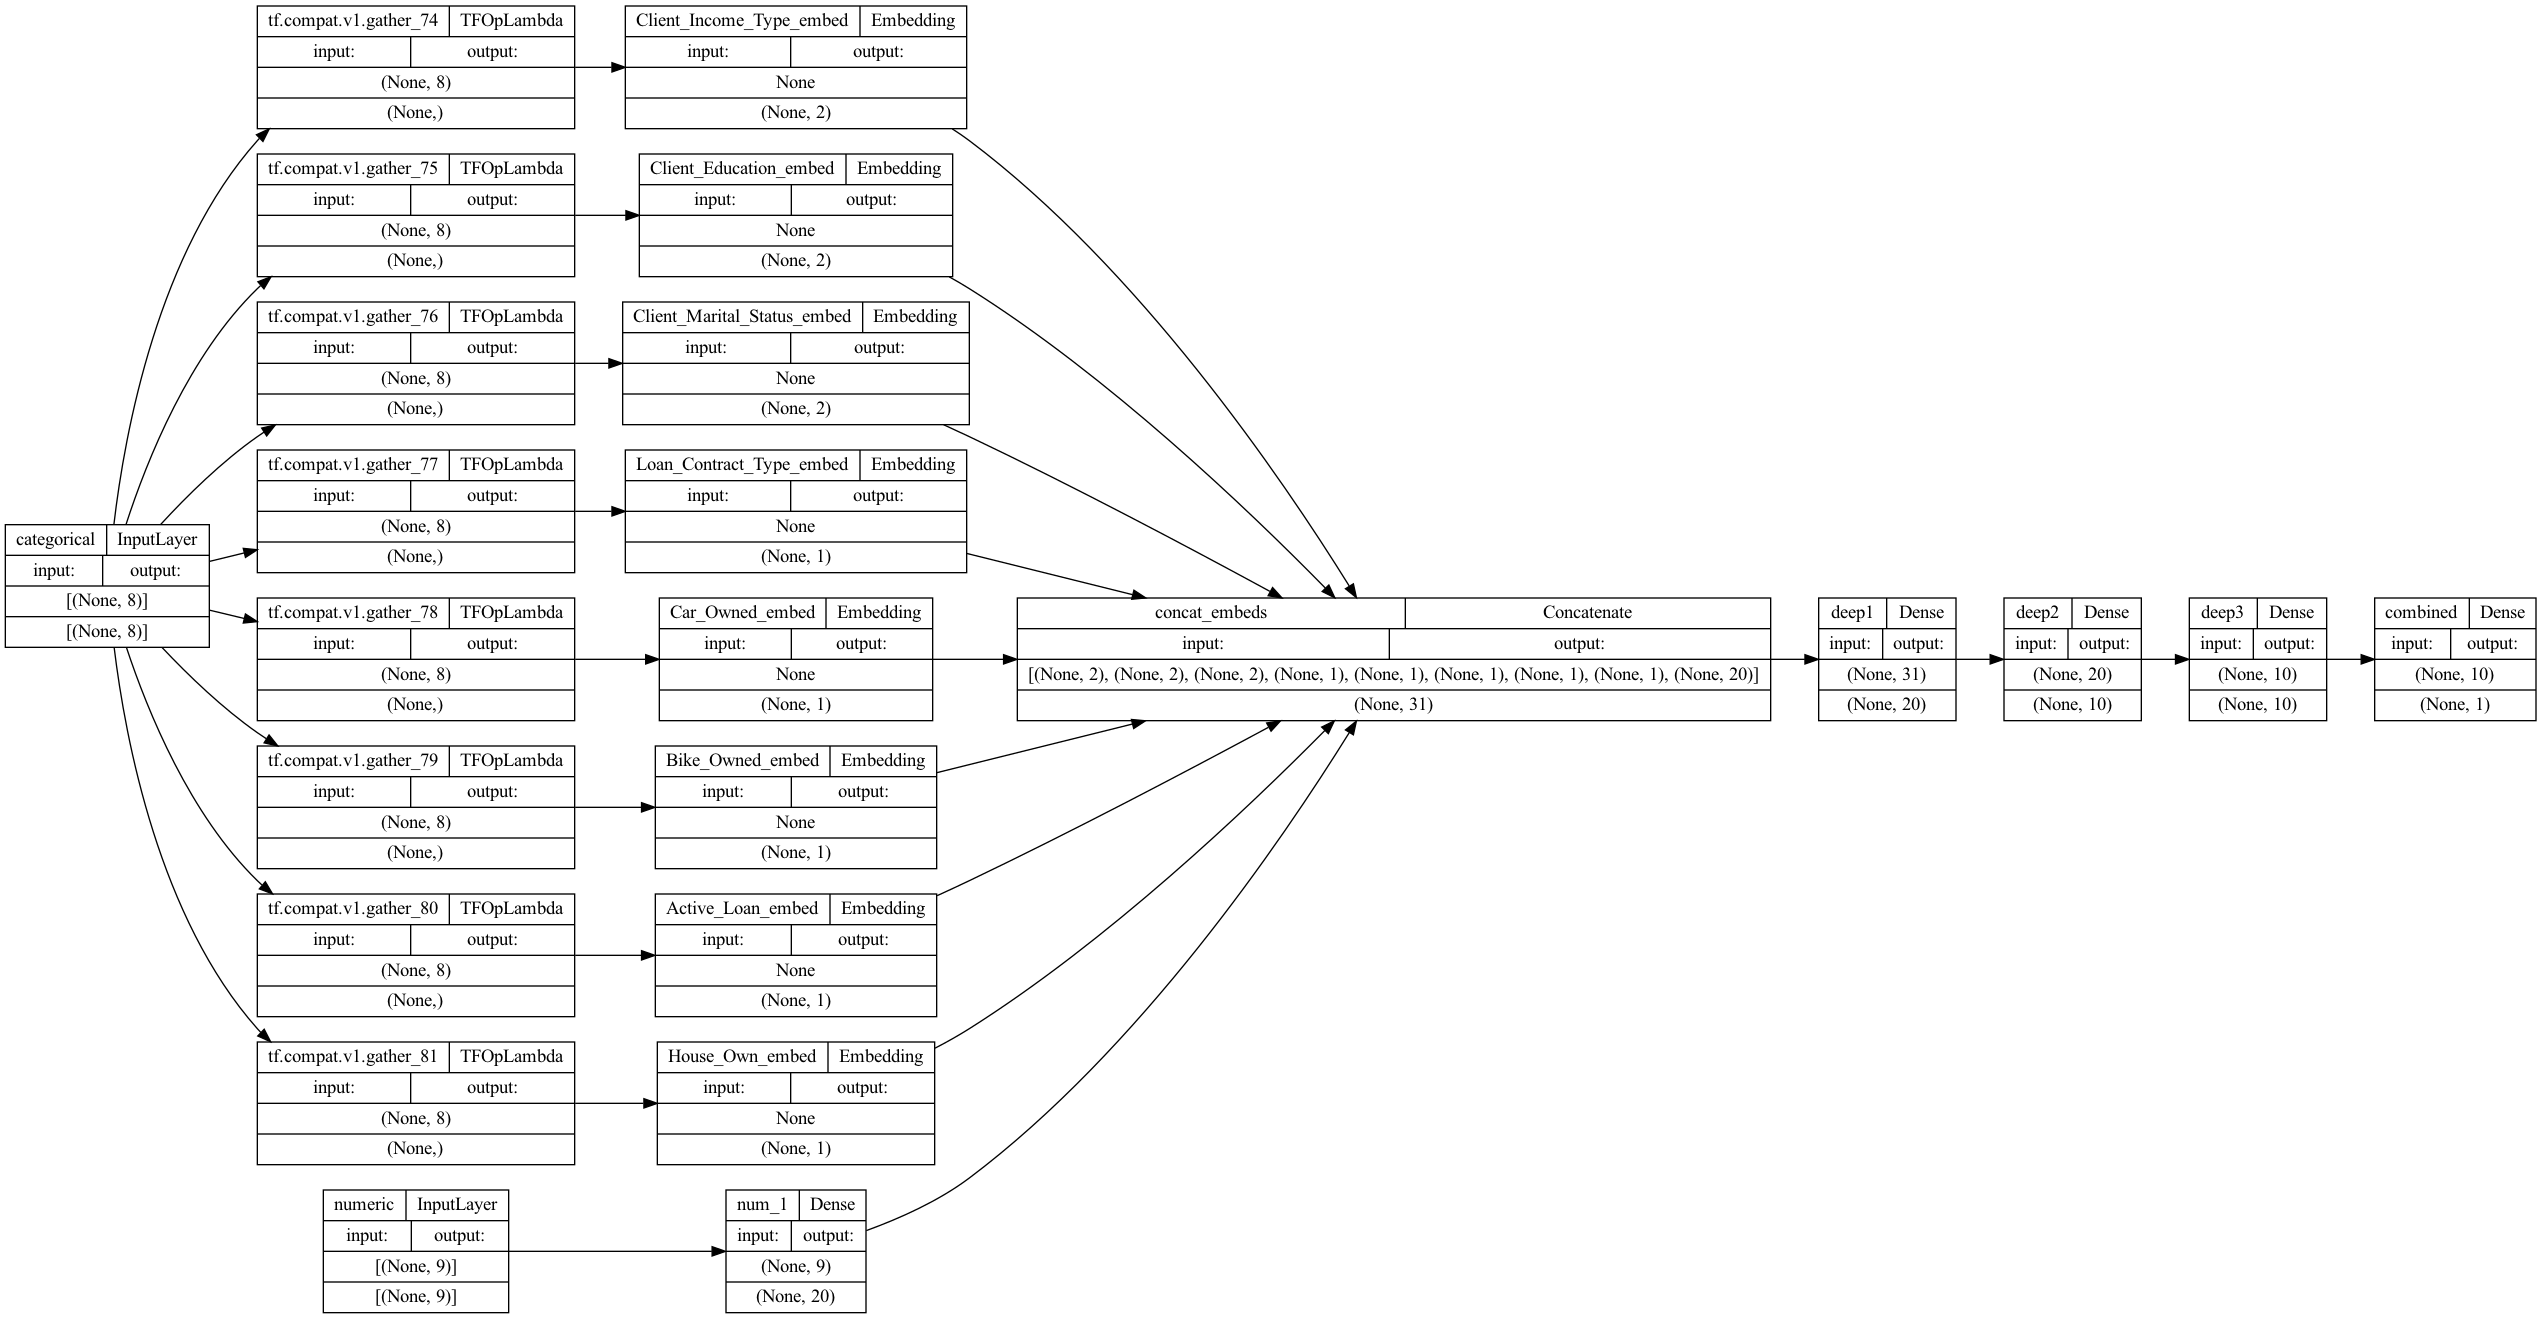

In [92]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model4, show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [93]:
# Calculate the false omission rate:
from sklearn.metrics import confusion_matrix
y_pred = model4.predict([categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
print('False omission rate: ', fn/(tn+fn))

False omission rate:  0.06840336134453781


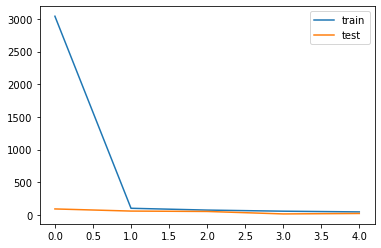

In [94]:
# plot history:
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='test')
plt.legend()

This looks similar to the first 2 plots for train/test loss, with the training loss starting really high and converging quickly.

In order for us to actually compare all these models let's plot the ROC Curves to guve a good indication of general classification performance

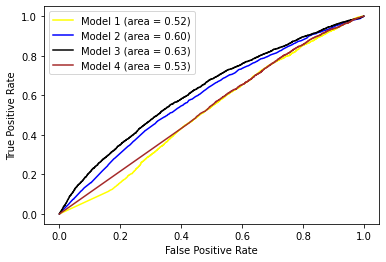

In [95]:
from sklearn.metrics import roc_curve, auc
plt.figure()
y_pred = model1.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow', label='Model 1 (area = %0.2f)' % roc_auc)
y_pred = model2.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='Model 2 (area = %0.2f)' % roc_auc)
y_pred = model3.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', label='Model 3 (area = %0.2f)' % roc_auc)
y_pred = model4.predict([categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='Brown', label='Model 4 (area = %0.2f)' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

The ROC curve shows that model 3 is the strongest performer, followed by model 2 and then Models 1 and 4. It is interesting to note that model 4 actually perfroms slightly better than model1 , particularly on the left hand side, at lower threshold values, as it has a higher True Positive rate in these stages. This indicates model1 has slightly better performance in terms of the recall, or finding the higher percentage of defaults. Either way, model 3 is dominant over all the other models based on the ROC Curve, and this includes the MLP/Model 4.

In [96]:

y_pred_model3 = model3.predict([crossed_features_test.to_numpy(), categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
y_pred_model4 = model4.predict([categorical_features_test.to_numpy(), numerical_features_test.to_numpy()])
y_pred_model3 = np.where(y_pred_model3 > 0.5, 1, 0).flatten()
y_pred_model4 = np.where(y_pred_model4 > 0.5, 1, 0).flatten()

both_correct = sum((y_pred_model3 == y_pred_model4) & (y_pred_model3 == y_test))
both_wrong = sum((y_pred_model3 != y_test) & (y_pred_model4 != y_test))
model3_correct = sum((y_pred_model3 == y_test) & (y_pred_model4 != y_test))
model4_correct = sum((y_pred_model4 == y_test) & (y_pred_model3 != y_test))

both_correct, both_wrong, model3_correct, model4_correct
# conduct macnemar test:
critical_value = (model3_correct - model4_correct - 1)**2 / (model3_correct + model4_correct)
# convert chi-squared critical value to p-value
from scipy.stats import chi2
import math
p = 1 - chi2.cdf(math.sqrt(critical_value), df=1)

In [97]:
p

0.0

Because the critical value is effectively 0, we can safely reject the bull hypothesis that the models are the same and safely conclude that there is a statistically significant difference between model 3 (wide/deep network with dropout and batch norm), and  model 4 (MLP Almost Equivalent to the deep part from model 1 in structure).

## Exceptional Work - Visualizing the Learned Embeddings

In [98]:
Income_type = model3.weights[0].numpy()
Education = model3.weights[1].numpy()
Marital_Status = model3.weights[2].numpy()
Loan_type = model3.weights[3].numpy()
Car_own = model3.weights[4].numpy()
Bike_own = model3.weights[5].numpy()
Active_Loan = model3.weights[6].numpy()
House_Own = model3.weights[7].numpy()

In [99]:
# print out the dimentions of the weights
print(Income_type.shape)
print(Education.shape)
print(Marital_Status.shape)
print(Loan_type.shape)
print(Car_own.shape)
print(Bike_own.shape)
print(Active_Loan.shape)
print(House_Own.shape)


(8, 2)
(5, 2)
(4, 2)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)


We decided it was only useful to visualize income_type, education, and marital status because the others were binary variables, so all the embeddings will show is that 2 binary outputs are different, which isn't really that useful of a conclusion. 

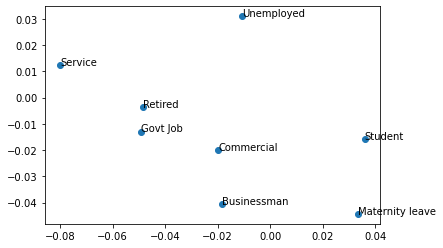

In [119]:
plt.scatter(Income_type[:,0], Income_type[:,1])
for i,txt in enumerate(encoders["Client_Income_Type"].classes_):
    plt.annotate(txt, (Income_type[i,0], Income_type[i,1]))

This plot of the learned embeddings for Income Type shows that Unemployed is the most different from the other labels, with Retired being close to Govt Job (pretty funny). Service jobs are very different from Students and Maternity Leave.

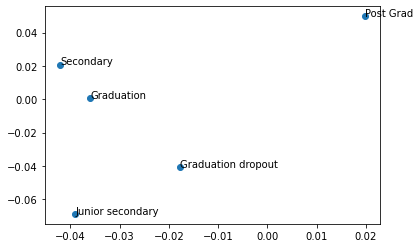

In [118]:
plt.scatter(Education[:,0], Education[:,1])
for i,txt in enumerate(encoders["Client_Education"].classes_):
    plt.annotate(txt, (Education[i,0], Education[i,1]))

The plot of the learned embeddings for Education shows that Post_Grad is the most different from the other categories in how it is embedded in the feature space, which makes sense, as we would expect this group to have a stable income source due to higher educational attainment. Secondary And Graduation are quite close, while junior secondary is near the bottom left and graduation dropout is equidistant from Graduation and junior secondary. 

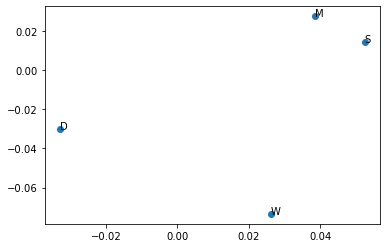

In [120]:
plt.scatter(Marital_Status[:,0], Marital_Status[:,1])
for i,txt in enumerate(encoders["Client_Marital_Status"].classes_):
    plt.annotate(txt, (Marital_Status[i,0], Marital_Status[i,1]))

Single and Married are extremely close but Divorced and Widowed are very far apart and away from the Married/Single group (opposite of class example).